![polytechnic of tehran](https://www.irangi.org/uploads/images/4_1560089256_1291127534.png)
<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">BTC Price Forecasting</span></div>.

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Professor: Dr. A.MohammadPour (adel.m@aut.ac.ir)</span></div>.     

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">TAs:Elmira Talebi Anaraki (e.talebi@aut.ac.ir)</span></div>.

<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Student: Mohammadreza Ardestani (ardestani.zr@gmail.com), Saba Sadeghi (sabasedegi@gamil.com) </span></div>


Date: June,20,2021



### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
import pandas as pd

In [ ]:
# Step 3: import dataset
# data link (on google drive) :
# https://drive.google.com/file/d/1eY7dAa-YeM3bXsVWfcULwTZnISUQYppc/view?usp=sharing

def loadFromGoogleDrive(url = None):
    # loading csv data from googleDrive
    if url == None:
        url = "https://drive.google.com/file/d/1WZzdZBT4QSrLKWHmA1KRUVm-AKE-LOGK/view?usp=sharing"

    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    df = pd.read_csv(path)
    df2= pd.read_csv(path,index_col='date',parse_dates=True)
    #df['Date'] = pd.to_datetime(df.Date)# Setting the index
    #df.set_index('Date', inplace=True)# Datetime conversion

    return df , df2


df , df2 = loadFromGoogleDrive("https://drive.google.com/file/d/14AQUegTVp-cfLL9FBONR_KRLfi93Wxj_/view?usp=sharing")
# print(df)# we don't need df anymore , we gonna use df1


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

# Yahoo! finance

In [ ]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3MB 4.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=7fe7a709ce9a272adfc9fc3990c6ac35487eec1131a922c70fc7a92589fe5011
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
dt= yf.download(tickers='BTC-USD',period='100mo',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2458 entries, 2014-09-17 to 2021-06-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2458 non-null   float64
 1   High       2458 non-null   float64
 2   Low        2458 non-null   float64
 3   Close      2458 non-null   float64
 4   Adj Close  2458 non-null   float64
 5   Volume     2458 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.4 KB


In [ ]:
dt.drop(['Low', 'High','Adj Close','Volume','Open'], axis='columns', inplace=True)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2458 entries, 2014-09-17 to 2021-06-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2458 non-null   float64
dtypes: float64(1)
memory usage: 38.4 KB


# the rest

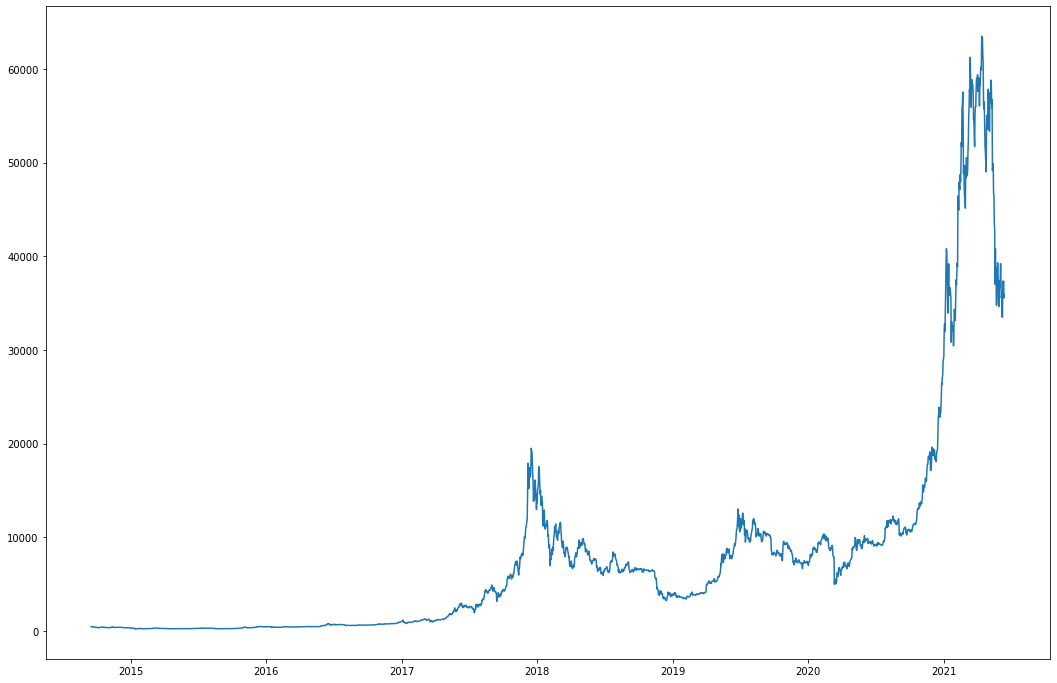

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams 
plt.rcParams['figure.figsize']= (18,12)
plt.rcParams['axes.grid']= False
plt.rcParams['font.size']= 10
plt.rcParams['font.style']= 'normal'
plt.plot(dt)

In [ ]:
df1 = dt

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2021-06-09,37345.121094
2021-06-10,36702.597656
2021-06-11,37334.398438


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00440947]
 [0.00389002]
 [0.0034219 ]
 ...
 [0.58675227]
 [0.55861374]
 [0.56386101]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1597, 861)

In [ ]:
train_data

array([[0.00440947],
       [0.00389002],
       [0.0034219 ],
       ...,
       [0.05199098],
       [0.05163831],
       [0.0522394 ]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1496, 100)
(1496,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(760, 100)
(760,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 251ms/step - loss: 0.0010 - val_loss: 0.0124
Epoch 2/100
24/24 [==============================] - 5s 197ms/step - loss: 2.0883e-04 - val_loss: 0.0059
Epoch 3/100
24/24 [==============================] - 5s 194ms/step - loss: 1.6373e-04 - val_loss: 0.0070
Epoch 4/100
24/24 [==============================] - 5s 192ms/step - loss: 1.6555e-04 - val_loss: 0.0053
Epoch 5/100
24/24 [==============================] - 5s 189ms/step - loss: 1.5963e-04 - val_loss: 0.0074
Epoch 6/100
24/24 [==============================] - 5s 190ms/step - loss: 1.2216e-04 - val_loss: 0.0105
Epoch 7/100
24/24 [==============================] - 5s 190ms/step - loss: 1.0651e-04 - val_loss: 0.0072
Epoch 8/100
24/24 [==============================] - 5s 189ms/step - loss: 1.2515e-04 - val_loss: 0.0119
Epoch 9/100
24/24 [==============================] - 5s 192ms/step - loss: 9.9019e-05 - val_loss: 0.0110
Epoch 10/100
24/24 [==============================] - 5s 1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4939.246226483102

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

22689.112058321814

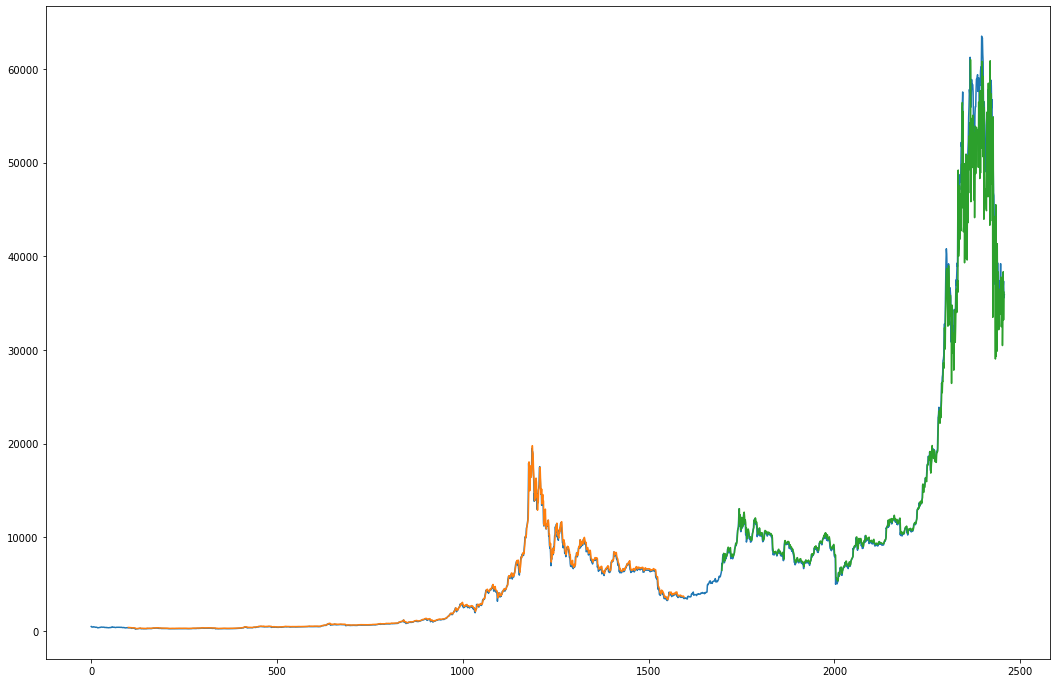

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

861

In [ ]:
x_input=test_data[761:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.7695855879334168,
 0.8058160777385399,
 0.8222365470293195,
 0.8629405239640369,
 0.8816444635125807,
 0.9100149375493051,
 0.9025450819565063,
 0.9643054329783731,
 0.9336578422804199,
 0.8800439740396769,
 0.8942200199329539,
 0.9268450596031138,
 0.9108645306083625,
 0.918566508373617,
 0.9180452667160961,
 0.905566494693433,
 0.8582824741078978,
 0.8615955354314232,
 0.8305703683801344,
 0.8136718372141138,
 0.8678863362263693,
 0.8810911454453663,
 0.8807316429151849,
 0.9091476407795129,
 0.9275840507341315,
 0.9276020628718825,
 0.9303967817518402,
 0.9349526805801857,
 0.9068372140005254,
 0.9250710490908483,
 0.9297978164862155,
 0.9161299966303723,
 0.8822822288968539,
 0.9182080544952911,
 0.9169613308100657,
 0.941410155334732,
 0.94791198189422,
 0.9429927560406912,
 1.0,
 0.9937819262954938,
 0.9970083813128465,
 0.9695119277548693,
 0.9554738104232748,
 0.8849232894372985,
 0.8771551849197525,
 0.8889792897576501,
 0.8484435289176142,
 0.814589530958367,
 0.8040310255

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.55163676]
101
1 day input [0.80581608 0.82223655 0.86294052 0.88164446 0.91001494 0.90254508
 0.96430543 0.93365784 0.88004397 0.89422002 0.92684506 0.91086453
 0.91856651 0.91804527 0.90556649 0.85828247 0.86159554 0.83057037
 0.81367184 0.86788634 0.88109115 0.88073164 0.90914764 0.92758405
 0.92760206 0.93039678 0.93495268 0.90683721 0.92507105 0.92979782
 0.91613    0.88228223 0.91820805 0.91696133 0.94141016 0.94791198
 0.94299276 1.         0.99378193 0.99700838 0.96951193 0.95547381
 0.88492329 0.87715518 0.88897929 0.84844353 0.81458953 0.80403103
 0.78756392 0.77103637 0.85027003 0.86624094 0.86294978 0.84290103
 0.90914727 0.91037703 0.89147508 0.90046382 0.83940211 0.9039966
 0.887771   0.90292901 0.92578518 0.91676098 0.87929542 0.89263569
 0.77334636 0.7822789  0.78487413 0.73559927 0.73079663 0.68470851
 0.67478974 0.58151019 0.64120661 0.58628316 0.58994585 0.54626586
 0.60841156 0.60361478 0.6177004  0.60416347 0.56090492 0.54382583
 0.56059735 0.58672791 0.57649615 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2458

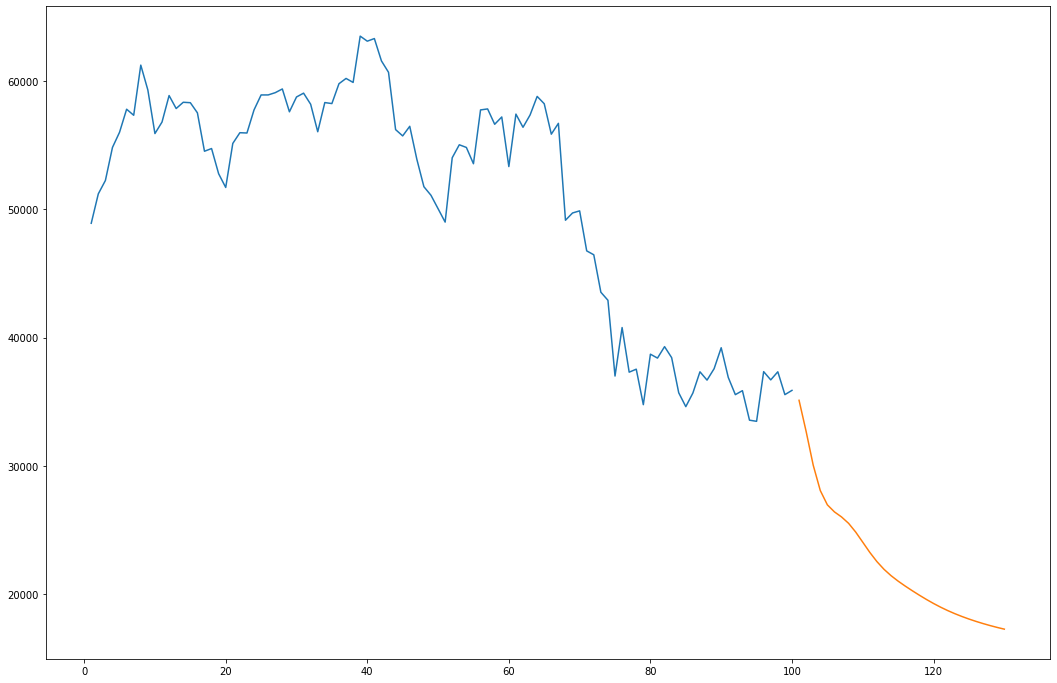

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2358:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

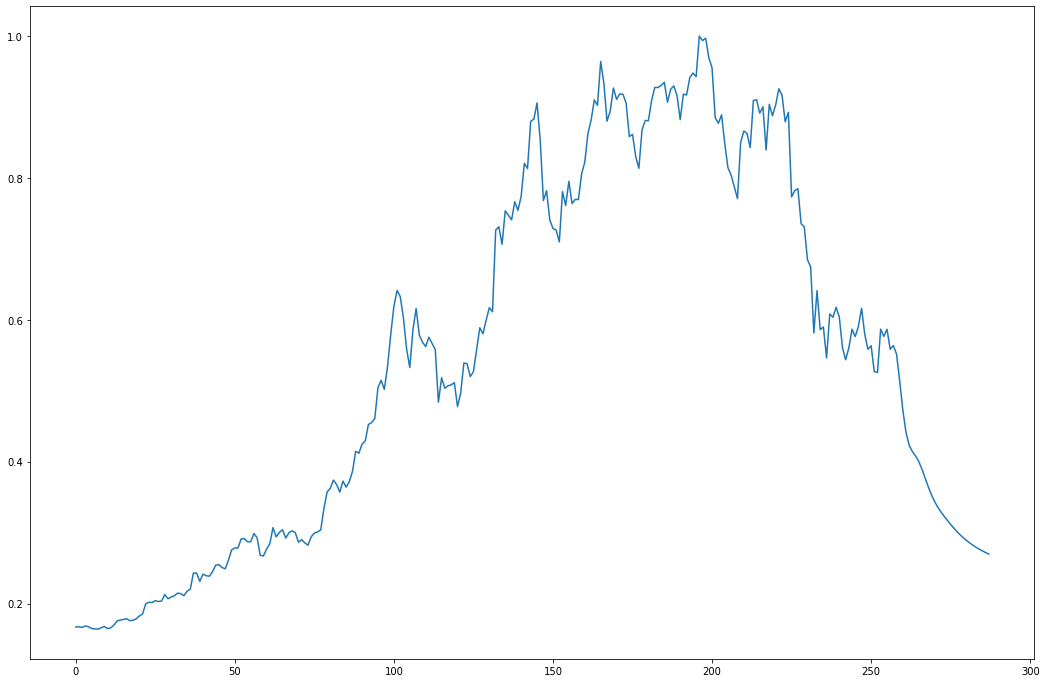

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

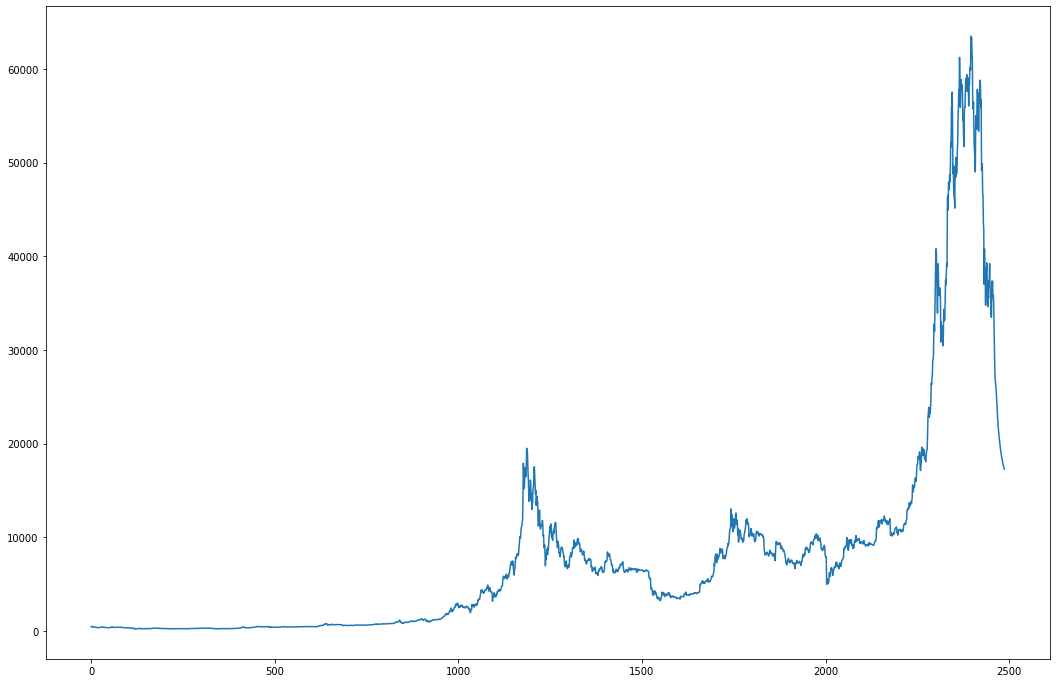

In [ ]:
plt.plot(df3)